**Two functions that you can use to visualize the embeddings using t-sne**
- visualize_tsne_embeddings: This function plots the embeddings specifically for the selected words.
- visualize_all_tsne_embeddings: This function plots and labels the embeddings for a selection of words, while also including all other embeddings in the visualization.

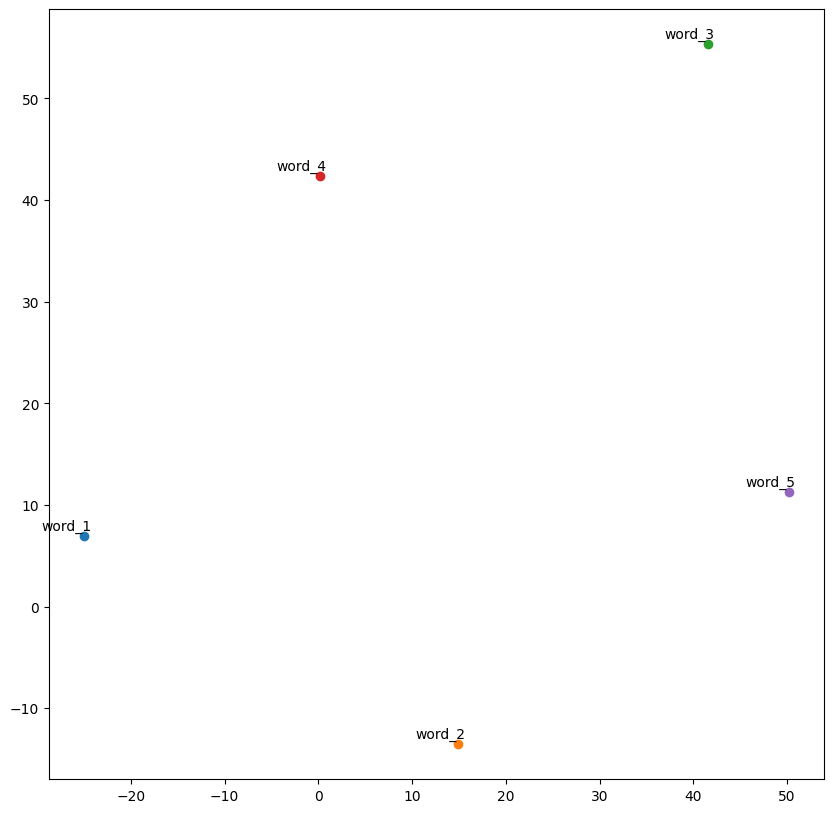

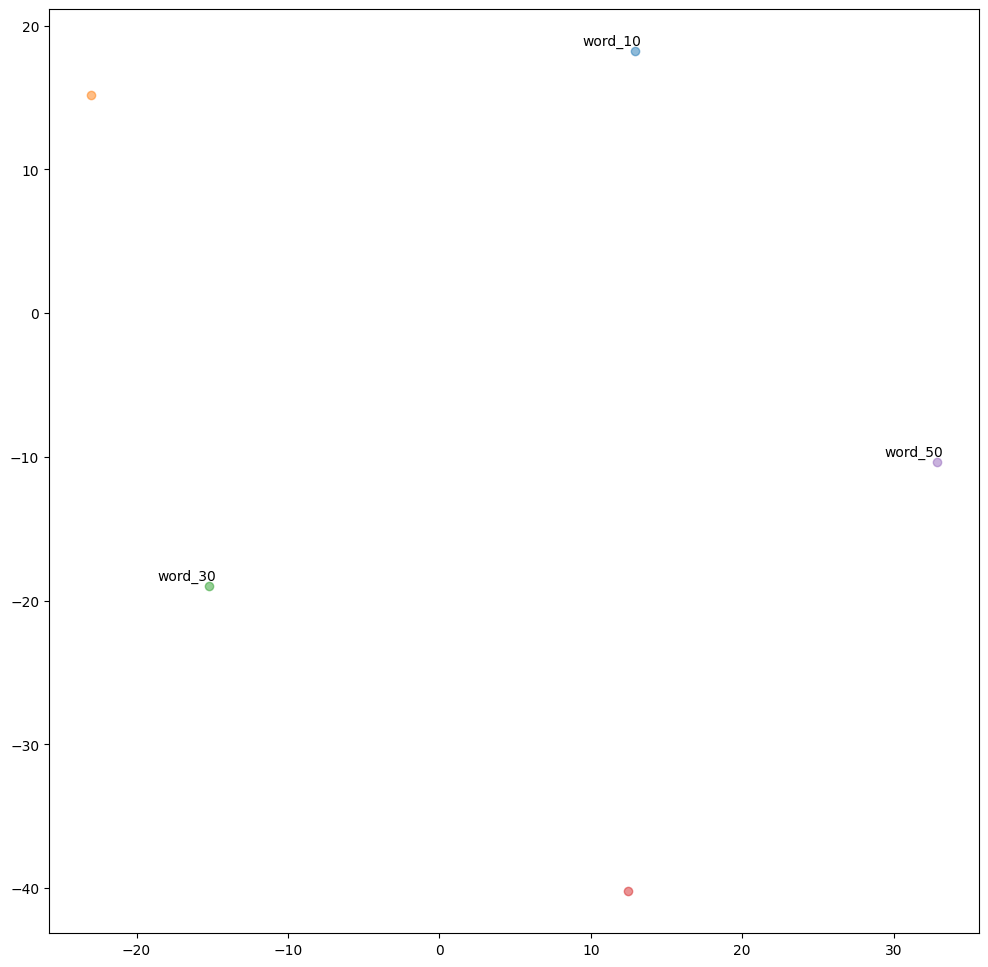

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

def visualize_tsne_embeddings(words, embeddings, word_index, filename=None):
    """
    Visualizes t-SNE embeddings of selected words.

    Args:
        words (list): List of words to visualize.
        embeddings (numpy.ndarray): Array containing word embeddings.
        word_index (dict): Mapping of words to their indices in the embeddings array.
        filename (str, optional): File to save the visualization. If None, plot is displayed.

    Returns:
        None
    """
    # Filter the embeddings for the selected words
    indices = [word_index[word] for word in words]
    selected_embeddings = embeddings[indices]

    # Set perplexity for t-SNE, it's recommended to use a value less than the number of selected words
    perplexity = min(5,len(words) - 1)

    # Use t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    reduced_embeddings = tsne.fit_transform(selected_embeddings)

    # Plotting
    plt.figure(figsize=(10, 10))
    for i, word in enumerate(words):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')

    # Save or display the plot
    if filename:
        plt.savefig(filename)
    else:
        plt.show()


def visualize_all_tsne_embeddings(embeddings, word_index, words_to_plot, words_to_label=None, filename=None):
    """
    Visualizes t-SNE embeddings of selected words with optional labeling.

    Args:
        embeddings (numpy.ndarray): Array containing word embeddings.
        word_index (dict): Mapping of words to their indices in the embeddings array.
        words_to_plot (list): List of words to plot.
        words_to_label (list, optional): List of words to label. Defaults to None.
        filename (str, optional): File to save the visualization. If None, plot is displayed.

    Returns:
        None
    """
    # Create a reverse mapping from index to word
    index_word = {index: word for word, index in word_index.items()}

    # Ensure words_to_label is a subset of words_to_plot
    if words_to_label is None:
        words_to_label = words_to_plot
    words_to_label = set(words_to_label).intersection(words_to_plot)

    # Filter the embeddings for the words to plot
    indices_to_plot = [word_index[word] for word in words_to_plot if word in word_index]
    selected_embeddings = embeddings[indices_to_plot]

    # Set perplexity for t-SNE, it's recommended to use a value less than the number of selected words
    perplexity = min(5,len(words_to_plot) - 1)

    # Use t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)
    reduced_embeddings = tsne.fit_transform(selected_embeddings)

    # Plotting
    plt.figure(figsize=(12, 12))
    for i, index in enumerate(indices_to_plot):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], alpha=0.5)
        if index_word[index] in words_to_label:  # Annotate only selected words
            plt.annotate(index_word[index],
                         xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')



# Mock embeddings and word_index
embeddings = np.random.randn(100, 50)  # Mock embeddings with 100 words and 50 dimensions
word_index = {f"word_{i}": i for i in range(100)}  # Mock word index

# Example usage of the first function
def example_plot_1():
    words = ["word_1", "word_2", "word_3", "word_4", "word_5"]  # Select some words to plot
    visualize_tsne_embeddings(words, embeddings, word_index, filename="plot_1.png")

# Example usage of the second function
def example_plot_2():
    words_to_plot = ["word_10", "word_20", "word_30", "word_40", "word_50"]  # Select some words to plot
    words_to_label = ["word_10", "word_30", "word_50"]  # Select some words to label
    visualize_all_tsne_embeddings(embeddings, word_index, words_to_plot, words_to_label, filename="plot_2.png")

example_plot_1()
example_plot_2()